# HR Analytics Project- Understanding the Attrition in HR

Project Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

Importing Important Libraries

In [1]:
import pandas as pd 
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

Importing dataset

In [3]:
data=pd.read_csv(r"C:\Users\h\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
data.shape

(1470, 35)

The Dataset contains 1470 rows and 35 columns

In [7]:
data.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [9]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Let's check the data type of the Columns

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Finding Missing values and Duplicate values if present

In [12]:
data.duplicated().sum()  # This will check the duplicate data for all columns.
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(data))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                          Missing Values  % Missing data
Age                                    0             0.0
StandardHours                          0             0.0
NumCompaniesWorked                     0             0.0
Over18                                 0             0.0
OverTime                               0             0.0
PercentSalaryHike                      0             0.0
PerformanceRating                      0             0.0
RelationshipSatisfaction               0             0.0
StockOptionLevel                       0             0.0
MonthlyIncome                          0             0.0
TotalWorkingYears                      0             0.0
TrainingTimesLastYear                  0             0.0
WorkLifeBalance                        0             0.0
YearsAtCompany                         0             0.0
YearsInCurrentRole                     0             0.0
YearsSinceLastPromotion                0             0.0
MonthlyRate                    

# Observations:
Thankfully, there are no data gaps! Working with the dataset will be simpler as a result.

There are no duplicate entries or missing values in the dataset.

So, let's go ahead

# Visualization

<AxesSubplot:>

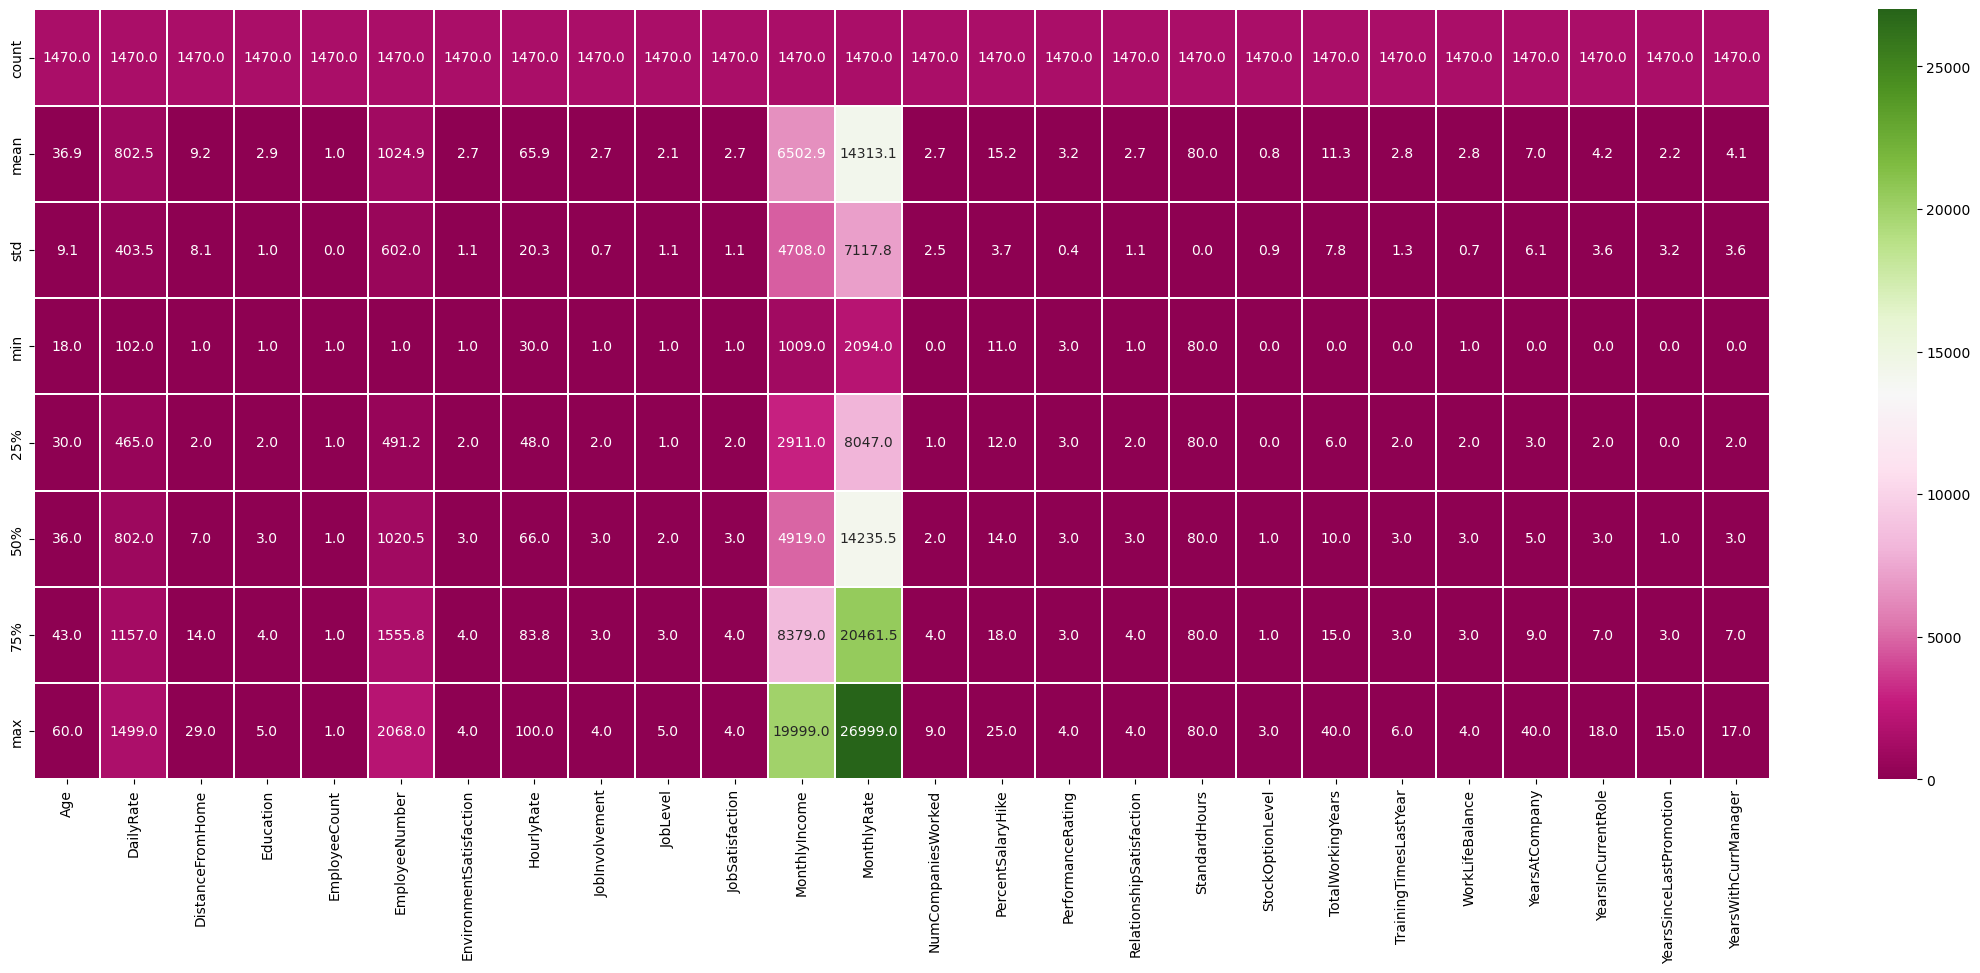

In [14]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(28,10))
sns.heatmap(data.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [16]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Observation:
    
1.Employees must be at least 18 years old and cannot be older than 60.

2.9.1 KM is the typical distance from home. It indicates that the majority of employees travel at least 18 KM each day to get to work.

3.Employee performance ratings range from 3.0 to 3.163 on average. This indicates that the majority of employees' performance is "Good."This suggests that there is a need to look into the Attrition of Employees with a "Outstanding" or "5" rating.

4.50% of employees have worked for at least two different firms.

5.By examining the 50% and max columns for Monthly Income and Monthly Rate, we may conclude that outliers exist in this feature.

6.We can notice that some of the characteristics are skew in nature by looking at Mean and Median.

7.The statistical terms mean, median, and standard deviation are useless for ordinal characteristics.

8.EmployeeCount and StandardHours both contain the same value for each static parameter. It implies that each one has a distinct worth.


Analyse some statistics now. With a target Variable.

In [18]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

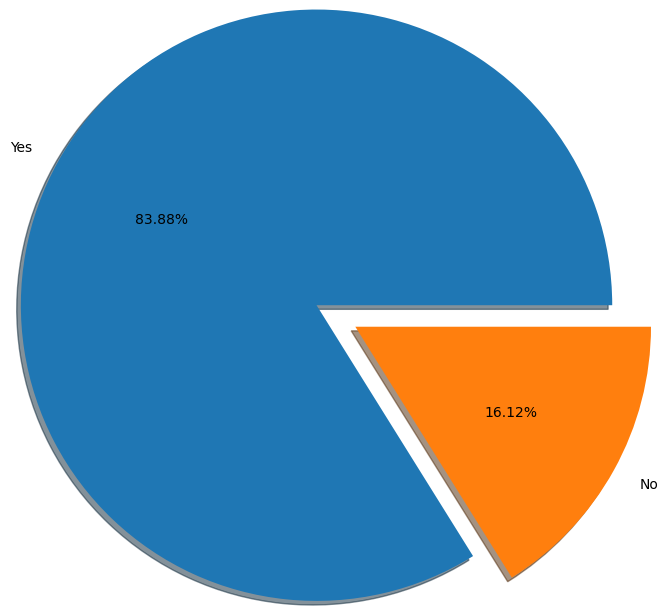

In [20]:
labels = 'Yes','No',
fig, ax = plt.subplots()
ax.pie(data['Attrition'].value_counts(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.1,0.2], shadow=True,)
plt.show()

Observation 

1.While 16.12% (237 workers) of the workforce left the company, 83.88% (1237 employees) of the workforce did not, causing our dataset to be deemed unbalanced since fewer individuals leave the company than do so.

2.Before getting to the important concerns that need to be addressed about HR Attrition, let's attempt to understand some of the particular qualities, such as the distribution of various subcategories and various insights about the company's human resource, such as education, job level, and working domain.

3.Start by listing Value counts and possible Sub-categories for various categorial attributes.

In [22]:
Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime' ]
for i in Category:
    print(i)
    print(data[i].value_counts())
    print("*"*100)

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
****************************************************************************************************
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
****************************************************************************************************
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
****************************************************************************************************
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
****************************************************************************************************
Gender
Male      882
Female    588
Name: Gender, dtype: int64
****************

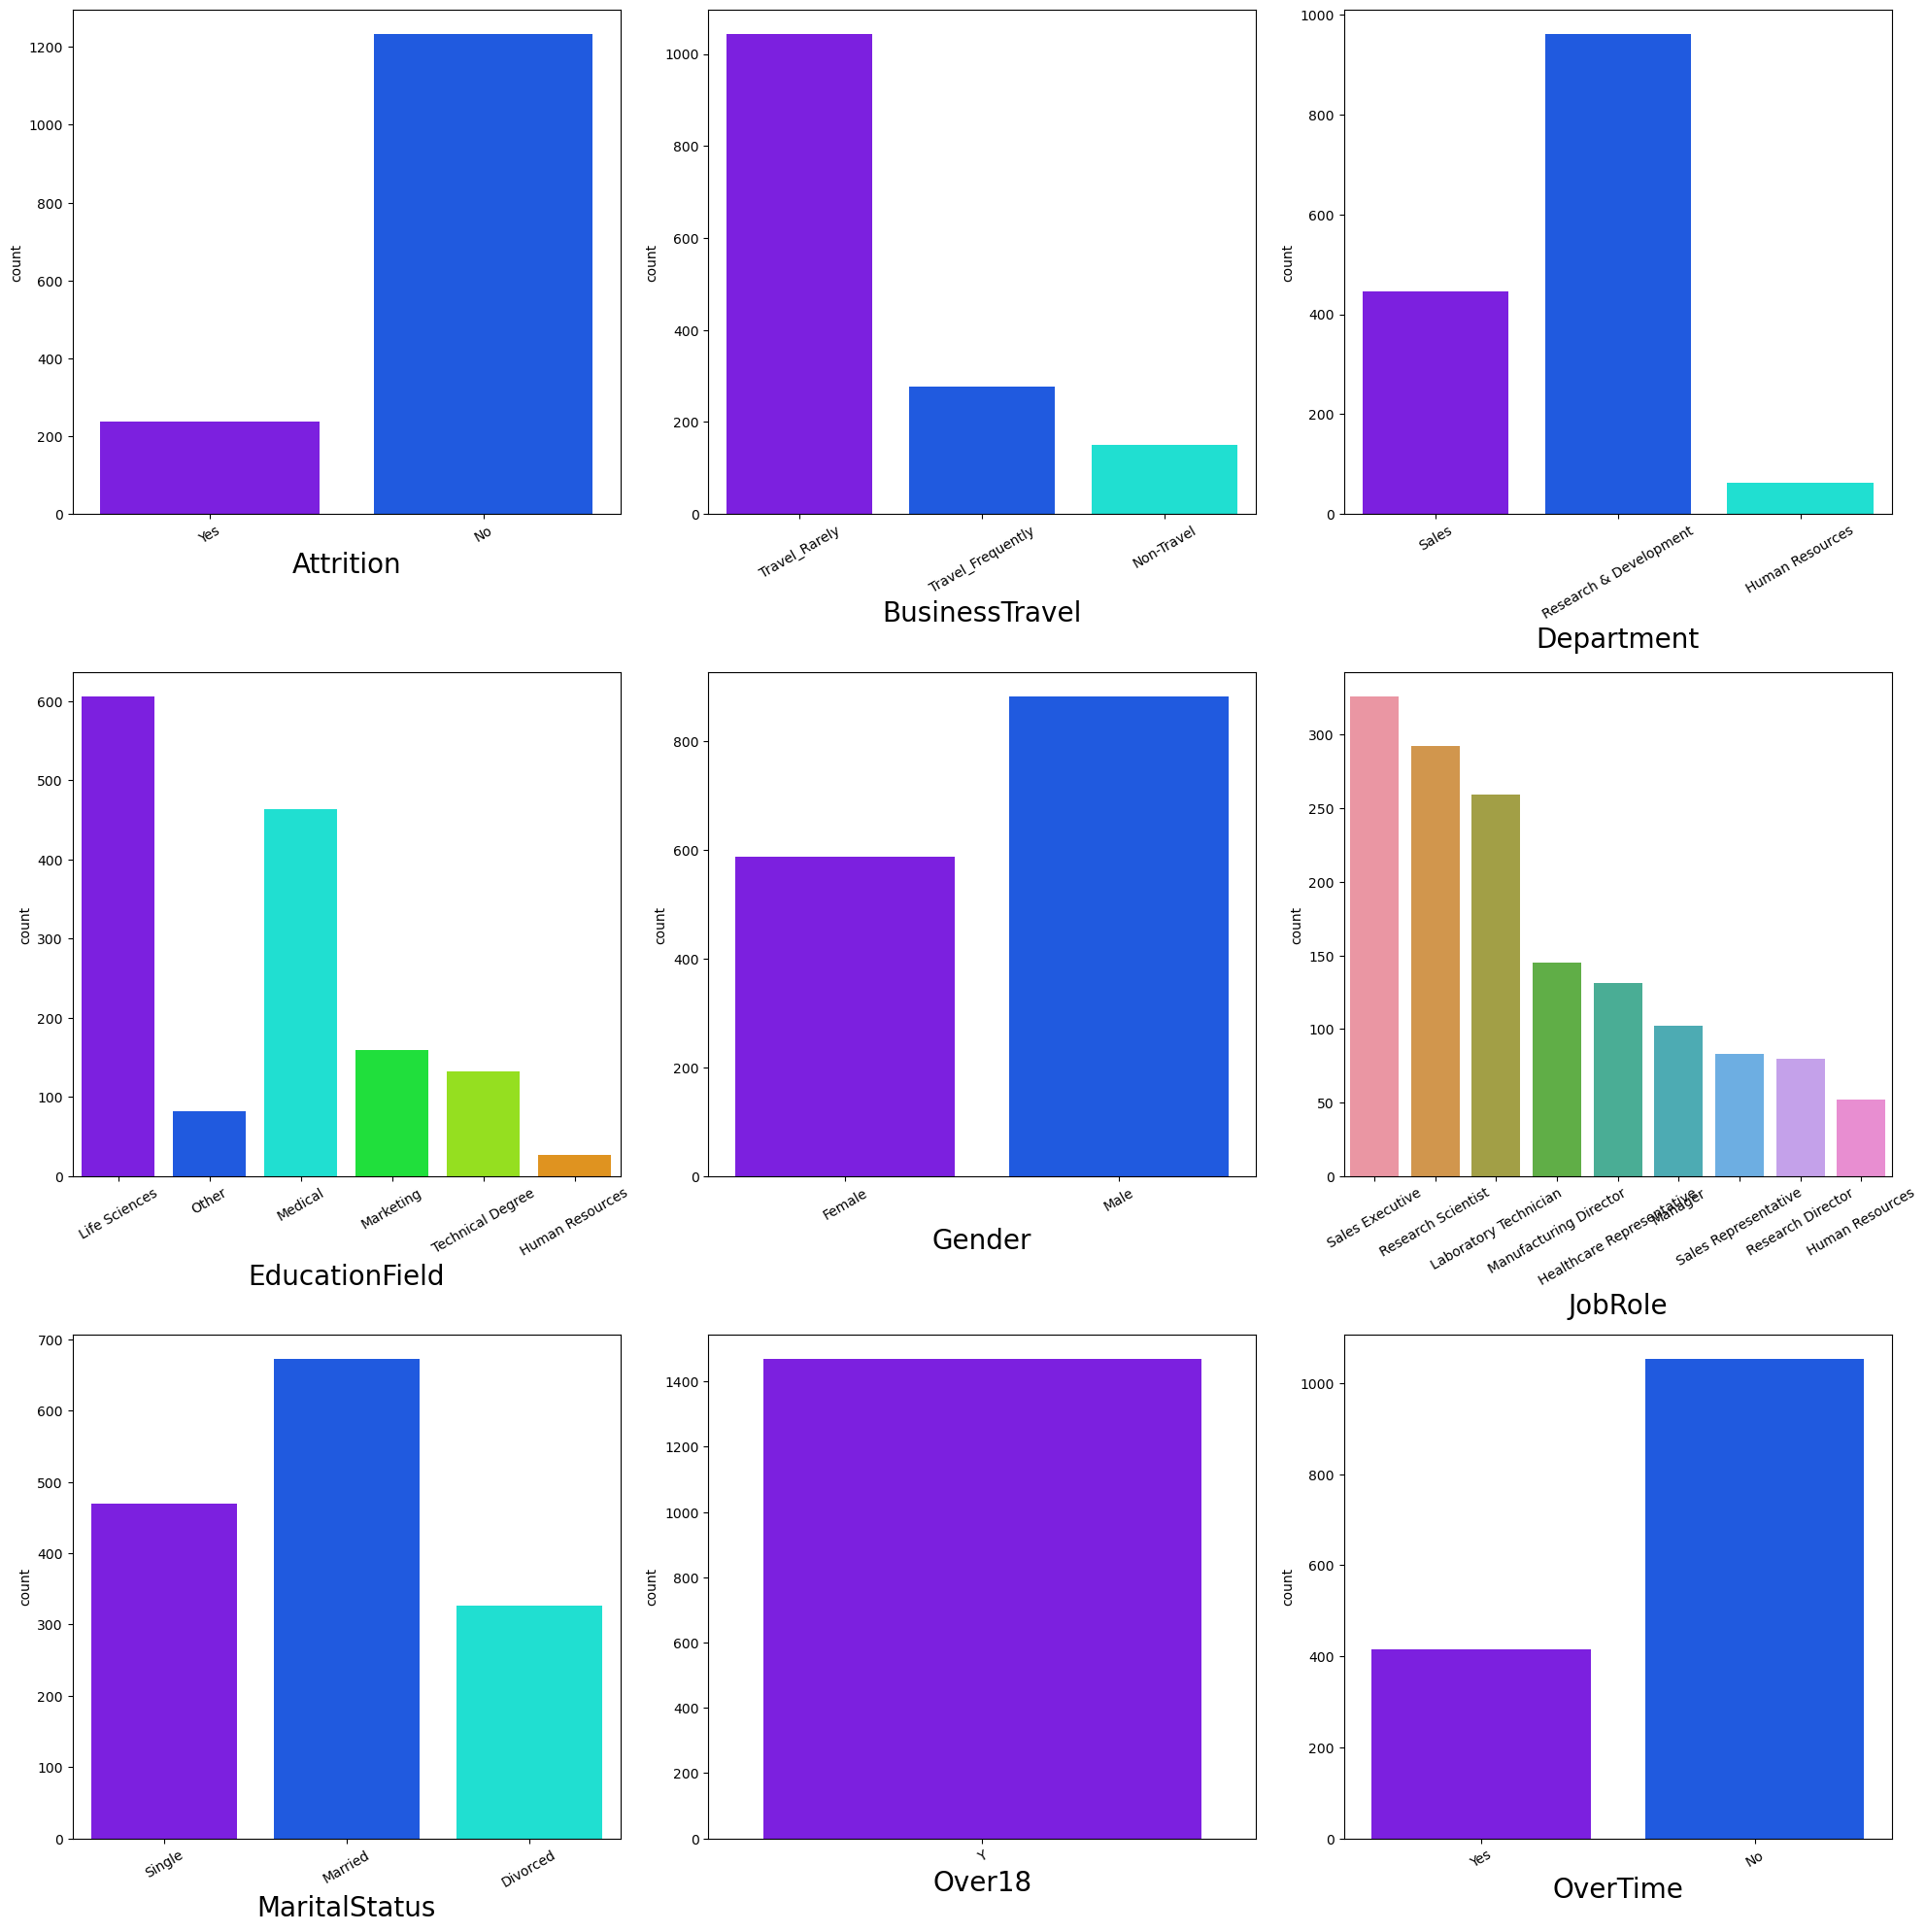

In [23]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime' ]
for i in Category:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(data[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

Listing Value counts and accessible Sub-categories for various Ordinal features

In [25]:
Ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for i in Ordinal:
    print(i)
    print(data[i].value_counts())
    print("*"*100)

Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
****************************************************************************************************
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64
****************************************************************************************************
JobInvolvement
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64
****************************************************************************************************
JobSatisfaction
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64
****************************************************************************************************
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64
****************************************************************************************************
PerformanceRating
3    124

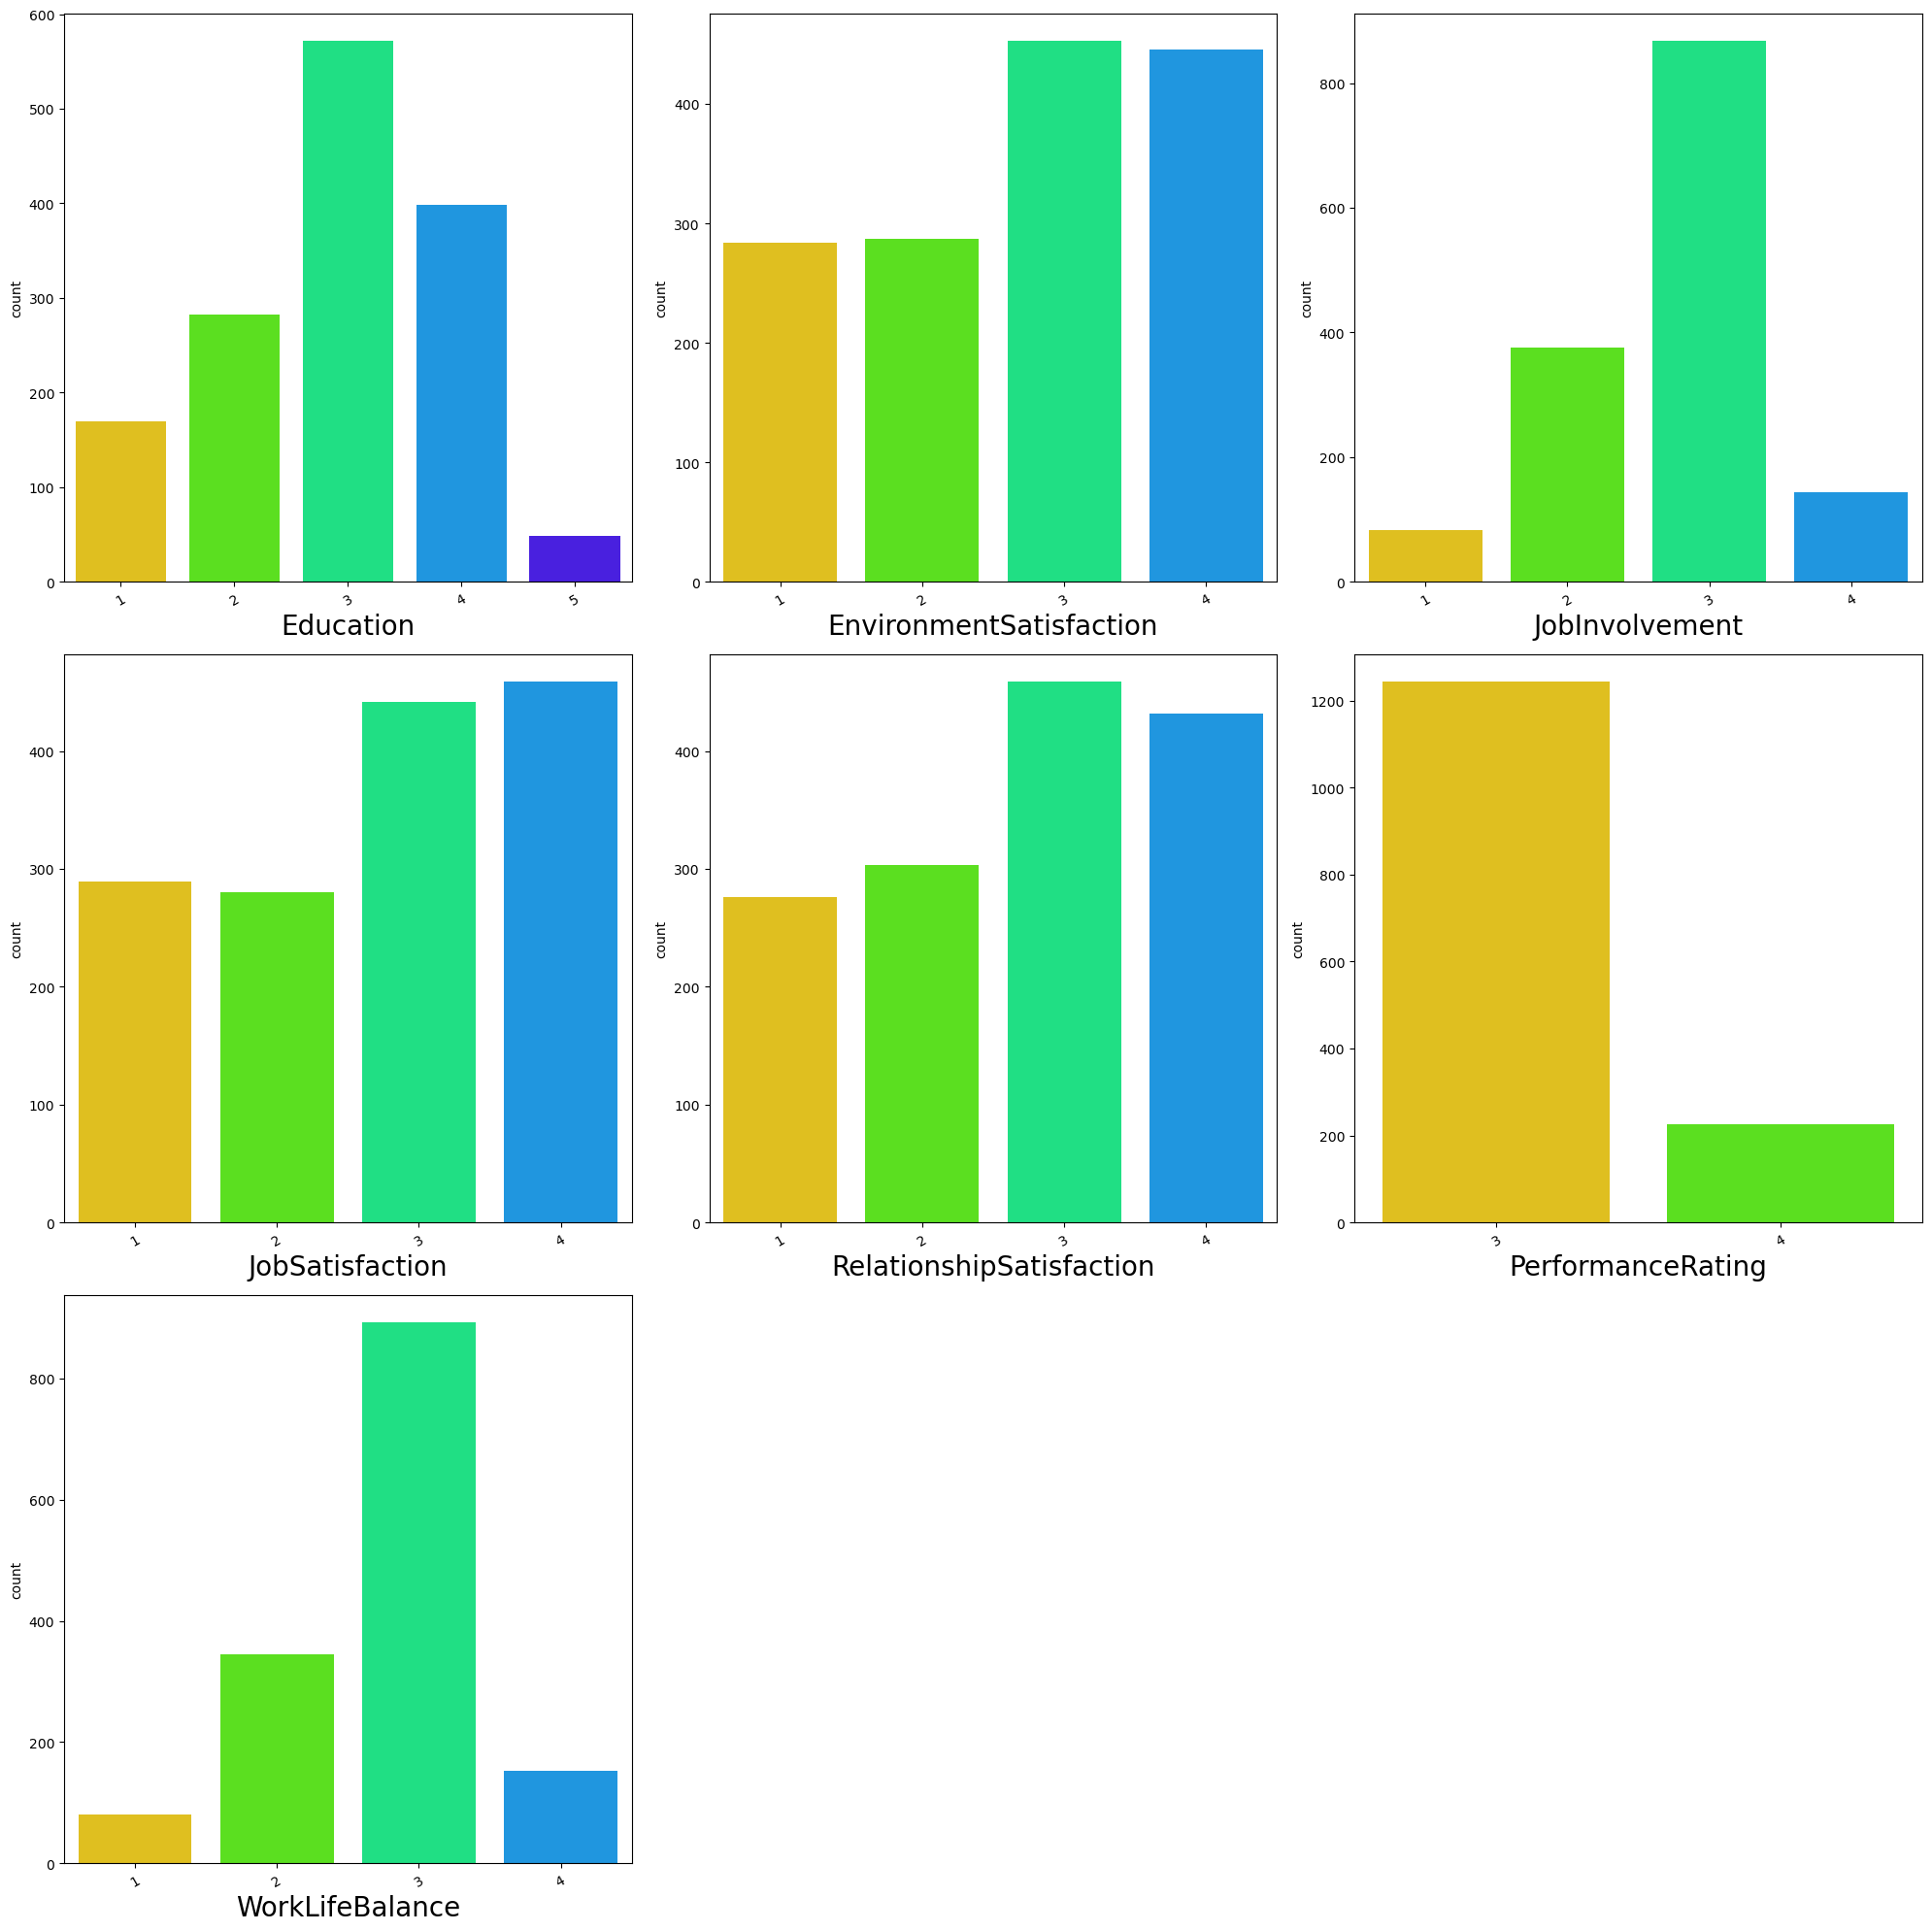

In [26]:
sns.set_palette('hsv')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
Ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for i in Ordinal:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(data[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

Let's analyse the educational qualification of the employee

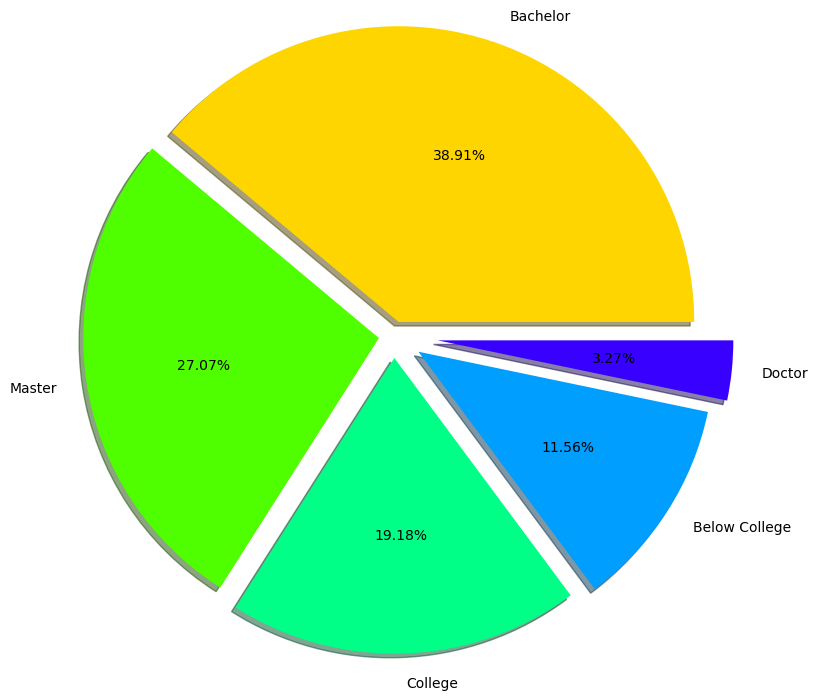

In [27]:
labels='Bachelor','Master','College','Below College','Doctor'
fig, ax = plt.subplots()
ax.pie(data['Education'].value_counts(),labels = labels,radius =2,autopct = '%3.2f%%',explode=[0.1,0.1,0.15,0.2,0.3], shadow=True,)
plt.show()


# Findings

1.More over 60% of the workforce has a master's or bachelor's degree. Finding out which department needs these human resources is intriguing.

2.Higher education is held by 30% of the workforce, including master's and doctoral degrees.

3.Graduates make up 39% of the workforce.

4.Nearly 19% of employees have a college degree, and 12% have less.

Let's attempt to visualise the department to which this human resource belongs and the education requirements of each department.

In [29]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

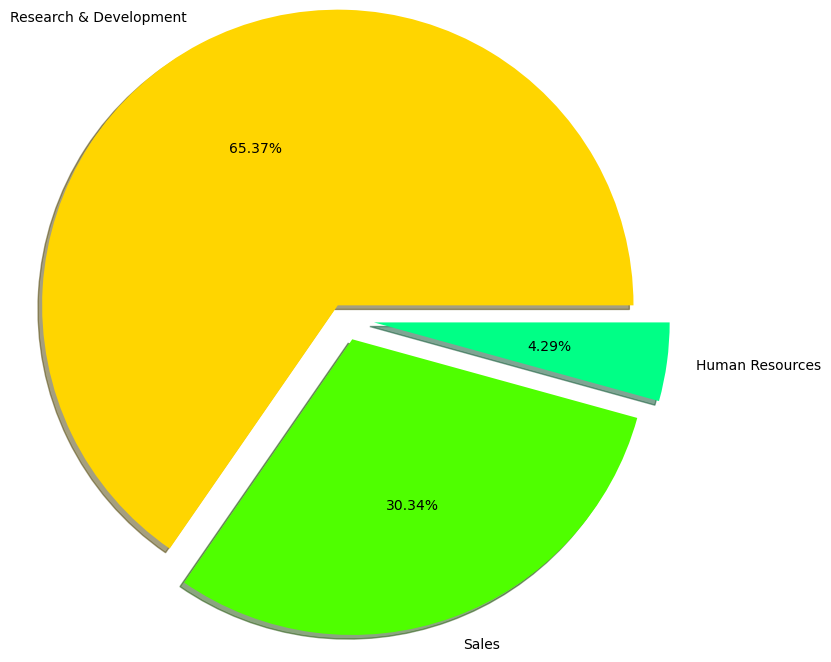

In [30]:
labels ='Research & Development','Sales','Human Resources'
fig,ax= plt.subplots()
ax.pie(data['Department'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.15,0.2],shadow=True)
plt.show()

In [33]:
pd.crosstab([data.Education],[data.Department], margins=True).style.background_gradient(cmap='summer_r')

Department,Human Resources,Research & Development,Sales,All
Education,,,,
1,5,115,50,170
2,13,182,87,282
3,27,379,166,572
4,15,255,128,398
5,3,30,15,48
All,63,961,446,1470


Findings:
1.The Department of Research and Development employs 65.37% of the workforce. 

2.There are 379, 255, and 30 employees total out of the total 961 employees with bachelor's, master's, and doctoral degrees, respectively.

3.Only 63 individuals work for the HR department.

In [36]:
pd.crosstab([data.Education],[data.Department,data.Attrition], margins=True).style.background_gradient(cmap='summer_r')

In [37]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

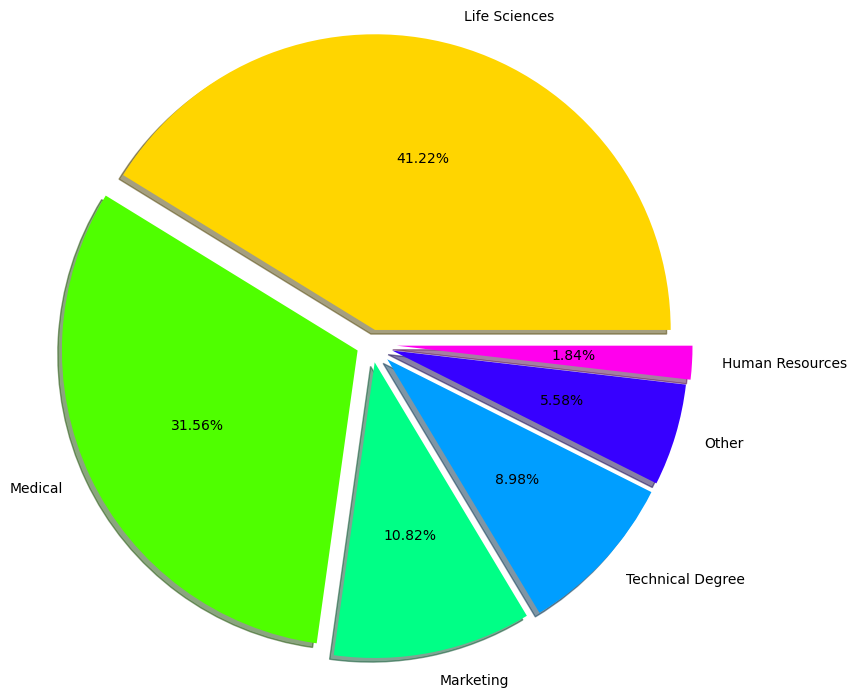

In [38]:
labels ='Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'
fig,ax= plt.subplots()
ax.pie(data['EducationField'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.1,0.125,0.15,0.15,0.175],shadow=True)
plt.show()

In [40]:

pd.crosstab([data.Education],[data.EducationField], margins=True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Education,,,,,,,
1,2,67,14,63,5,19,170
2,2,116,24,99,19,22,282
3,16,233,59,183,24,57,572
4,5,173,52,104,33,31,398
5,2,17,10,15,1,3,48
All,27,606,159,464,82,132,1470


# Observation

1.The employee's background is in life sciences (41.22%), followed by the medical field (31.56%).

2.There are only 27 persons with HR backgrounds, yet past results indicate that 63 people work in the HR Department. This suggests that at least half of the employees in the HR department lack HR experience. This is crucial because it increases the likelihood that employees will stay on board when they are employed in fields that interest them or align with their educational background. Unhappiness with our work might be viewed as a primary factor in leaving a job.

3.The majority of technical employees hold bachelor's degrees.

4.The majority of employees with master's and doctoral degrees work in the life sciences and medical fields.

5.Except for the support workers, practically everyone in the R&D department has a professional or technical background. When examining the attrition of this group, factors like salary increases, travel, overtime, and job level must be taken into account.

6.There are 159 employees in the sales department that have backgrounds in marketing.

7.50% of the sales team members have backgrounds in the medical and life sciences. Therefore, it will be fascinating to observe how many of these employees leave.

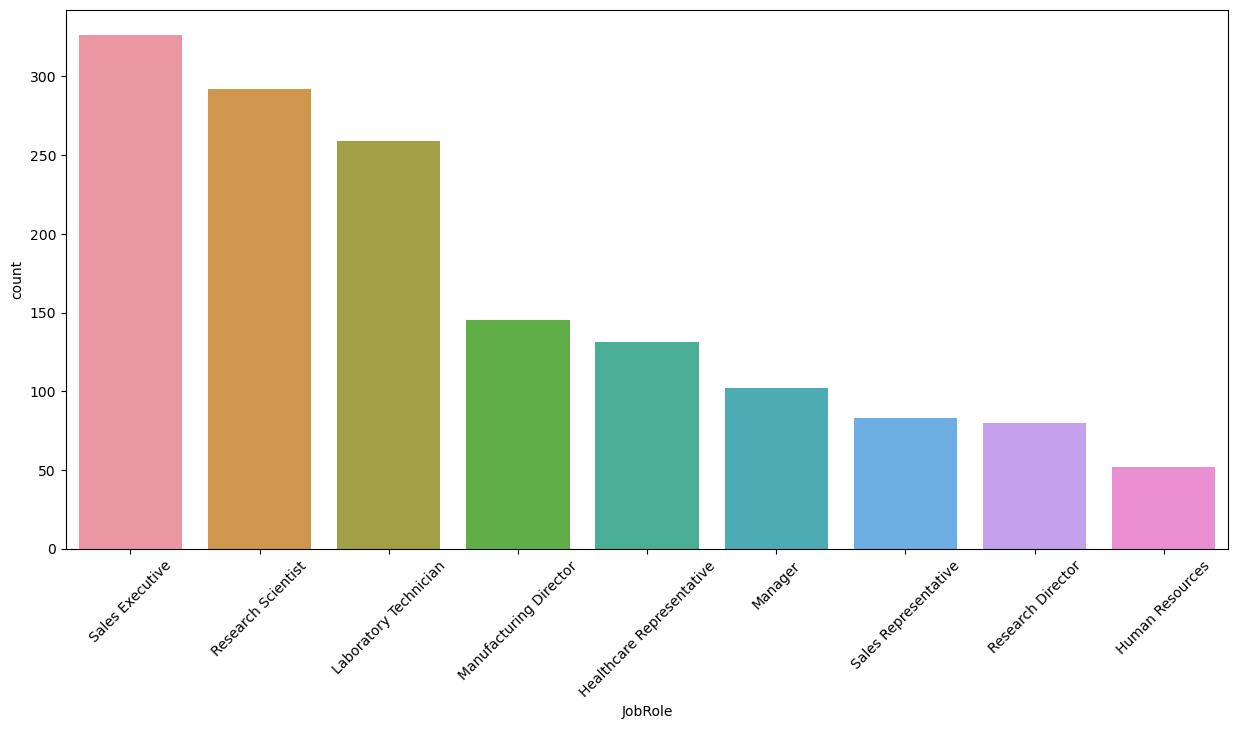

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(data['JobRole'])
plt.xticks(rotation=45)
plt.show()


In [47]:
pd.crosstab([data.JobRole],[data.Department], margins=True).style.background_gradient(cmap='gist_rainbow_r')


Department,Human Resources,Research & Development,Sales,All
JobRole,,,,
Healthcare Representative,0,131,0,131
Human Resources,52,0,0,52
Laboratory Technician,0,259,0,259
Manager,11,54,37,102
Manufacturing Director,0,145,0,145
Research Director,0,80,0,80
Research Scientist,0,292,0,292
Sales Executive,0,0,326,326
Sales Representative,0,0,83,83


# Observations

1.There are 3 job roles in the HR Department, with the sales executive having the most employees (446).

2.Manager and HR are the two job roles in the human resources department.

3.In the R&D department, there are 6 separate job roles with a total of 961 individuals, and as of this point, we know that every single one of them comes from a certain domain background.

<Figure size 1200x1000 with 0 Axes>

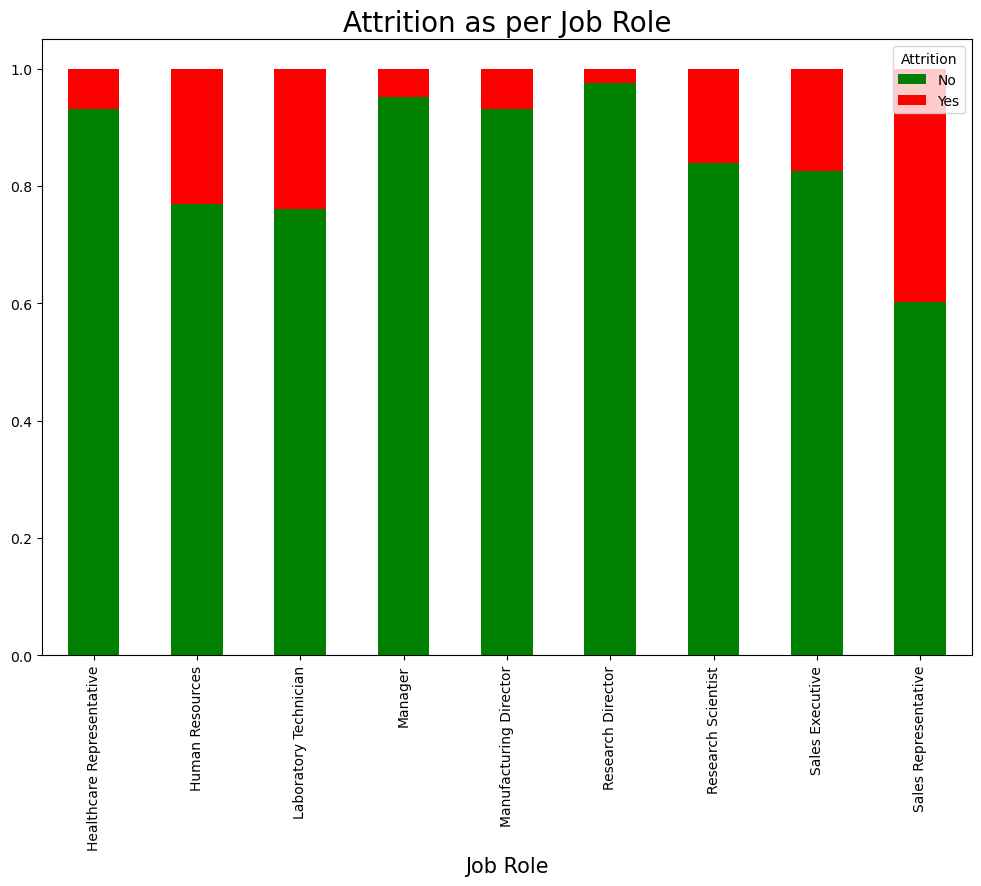

In [48]:
plt.figure(figsize=(12,10))
data=pd.crosstab(data['JobRole'], data['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, 
                    color=['green', 'red'],figsize=(12,8))
plt.title('Attrition as per Job Role', fontsize=20)
plt.xlabel('Job Role',fontsize=15)
plt.show()

In [57]:
# As we have 35 Columns Lets sort Columns by their datatype
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['No', 'Yes']}

In [50]:
# Grouping Numeric Features
Numeric=['Age', 'DailyRate', 'DistanceFromHome',  
 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [51]:
# Grouping Numeric Features
Numeric_int=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate', 
             'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [60]:
data2=pd.read_csv(r"C:\Users\h\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [61]:
data2.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

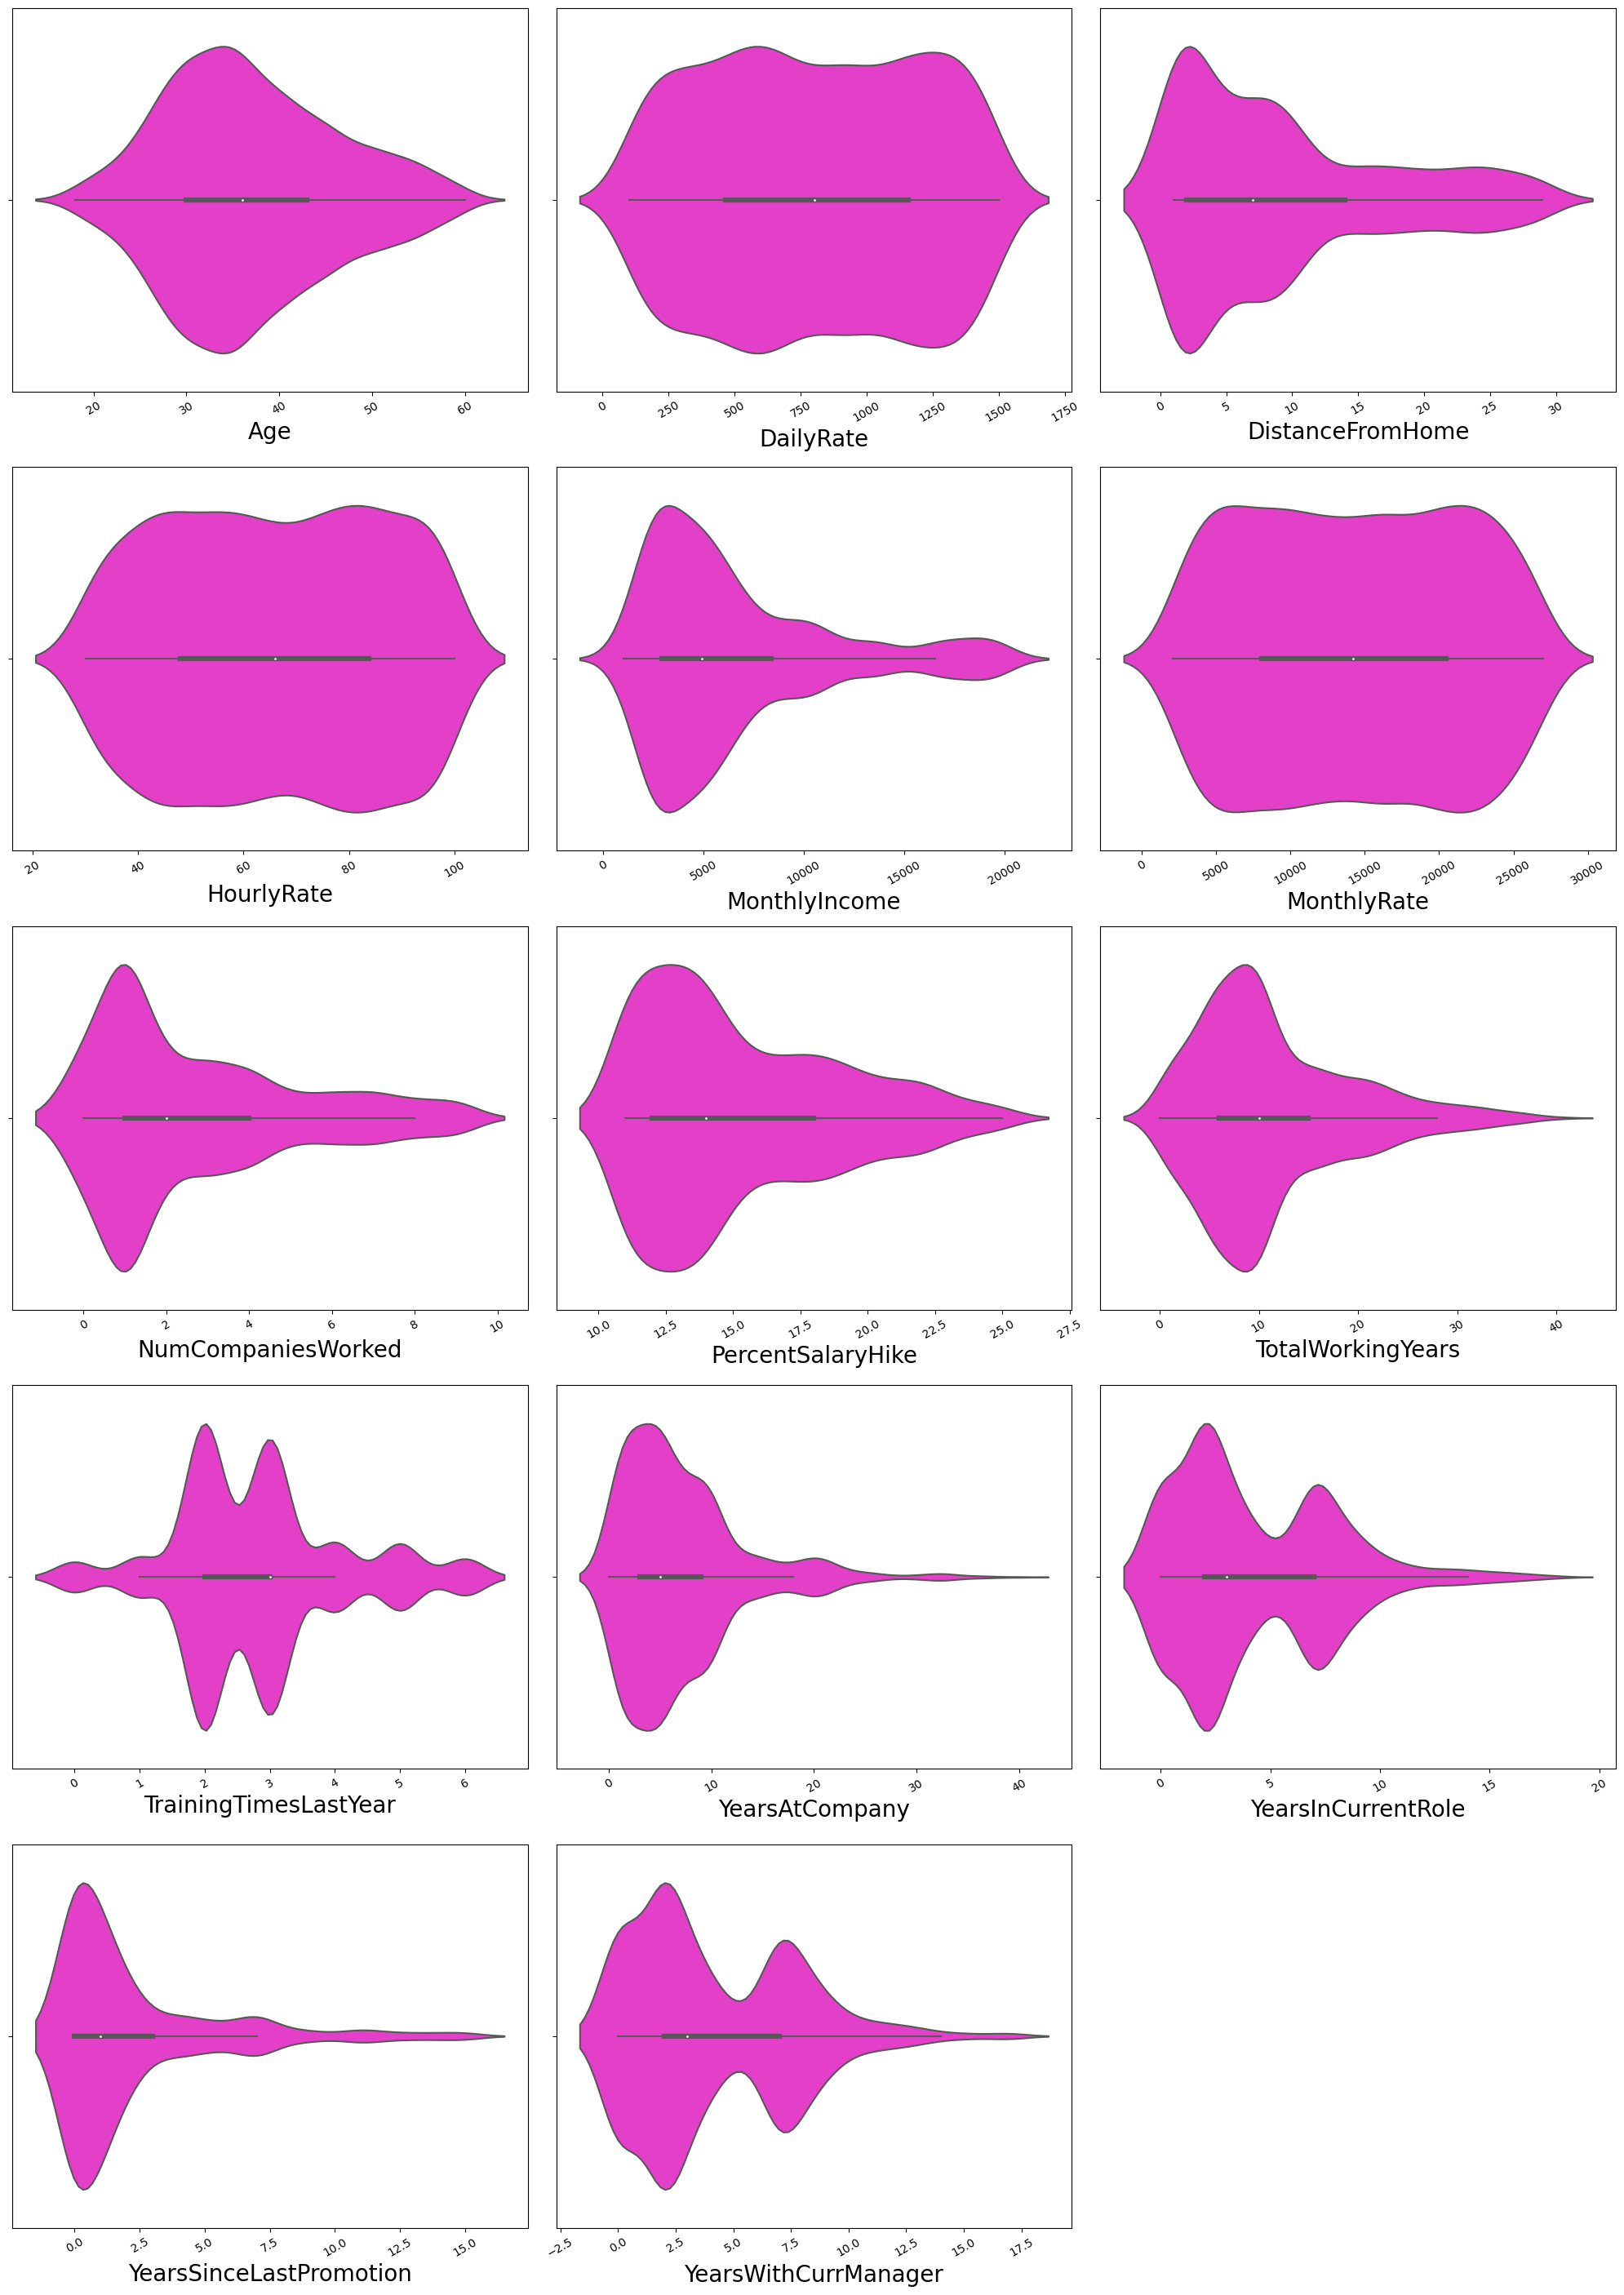

In [62]:
sns.set_palette('spring')
plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1

for i in Numeric_int:
    if plotnumber <=25:
        ax = plt.subplot(9,3,plotnumber)
        sns.violinplot(data2[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

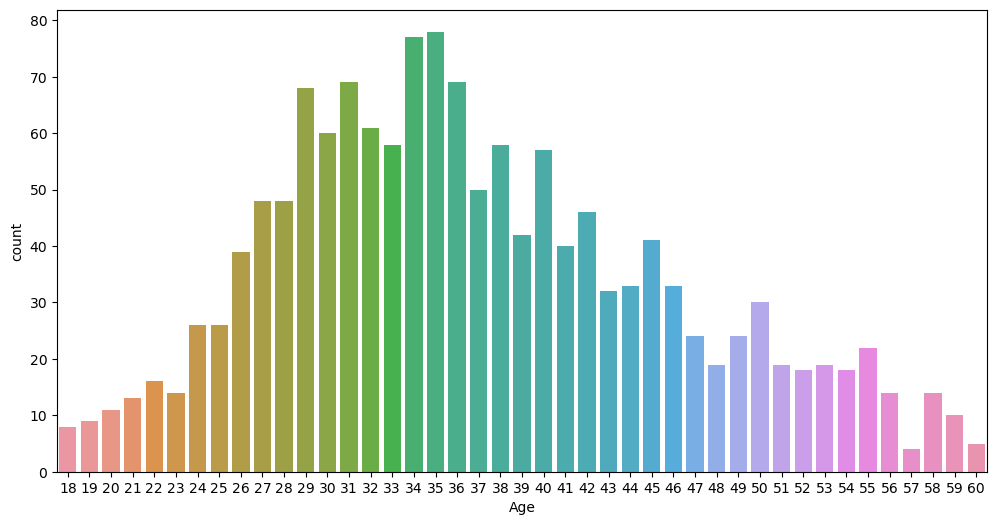

In [64]:
#Age and Attrition
plt.subplots(figsize=(12,6))
sns.countplot(data2['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

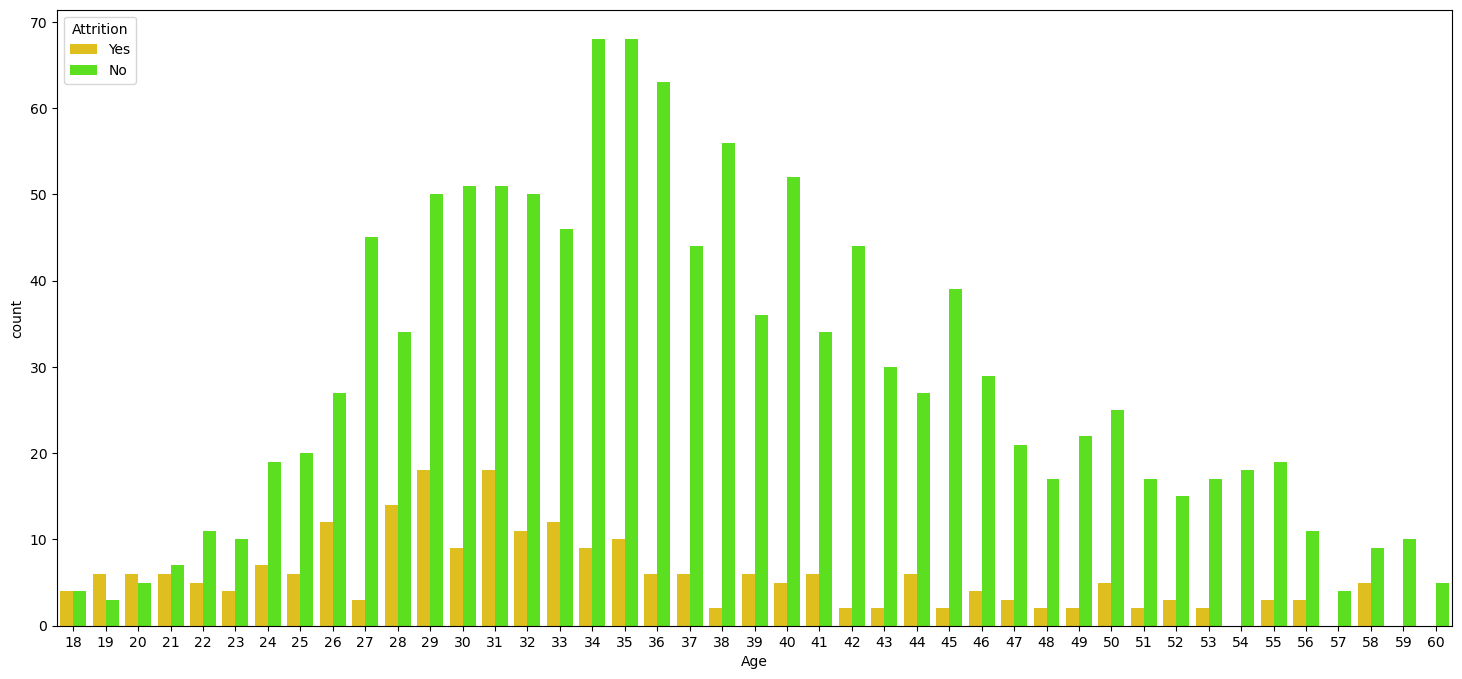

In [66]:
sns.set_palette('hsv')
plt.subplots(figsize=(18,8))
sns.countplot(x='Age', hue='Attrition', data=data2)

As we can observe from the above plots: Attrition is dependent on Age factor

1.Between the ages of 34 and 35, there is the lowest rate of attrition.

2.The age range between 29 and 31 is when attrition is at its highest.


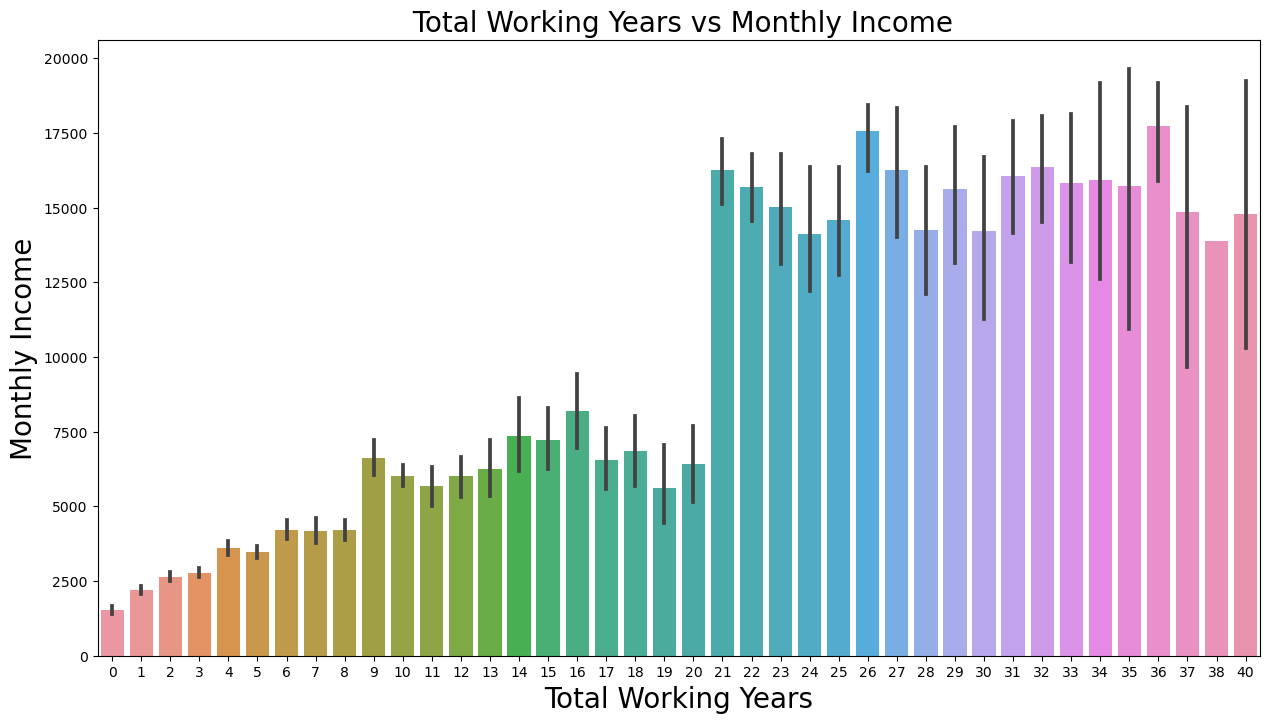

In [69]:
plt.figure(figsize=(15,8))
sns.barplot(data2['TotalWorkingYears'],data2['MonthlyIncome'])
plt.xlabel('Total Working Years',fontsize=20)
plt.ylabel('Monthly Income',fontsize=20)
plt.title(" Total Working Years vs Monthly Income", fontsize=20)
plt.show()

Observation
Employees with 21 or more total working years have the highest monthly wages.

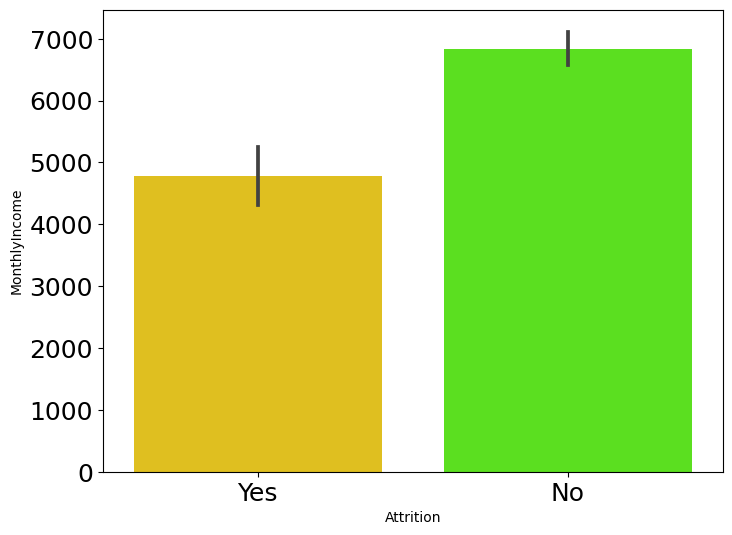

In [71]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='MonthlyIncome',data=data2)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Observation:
    
we can clearly observe that When the monthly salary hits 69,00, the employee attrition rate is lower.

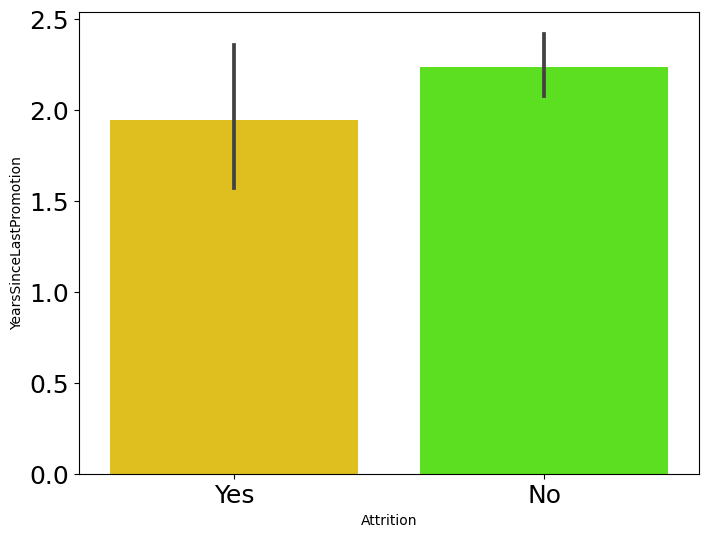

In [72]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='YearsSinceLastPromotion',data=data2)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# Observation:

When an employee has not been promoted since 1.8 years, attrition is significant.


Encoding categorical data

In [74]:
# Utilising Label Encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data2["Attrition"] = le.fit_transform(data2["Attrition"])
data2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Removing independent columns from the datset

In [76]:
data2.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [77]:
data2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [78]:
data2.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [79]:
data2.shape

(1470, 31)

# Features having outliers:
"YearsInCurrentRole", "MonthlyIncome", "NumCompaniesWorked", "PerformanceRating", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", , "YearsSinceLastPromotion", "YearsWithCurrManager", "Attrition".

In [93]:
df=pd.read_csv(r"C:\Users\h\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [94]:
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [95]:
df.shape

(1470, 31)

In [96]:
# Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

oe_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df=ordinal_encode(df, oe_col)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,No,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,No,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,No,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


# Outliers treatment

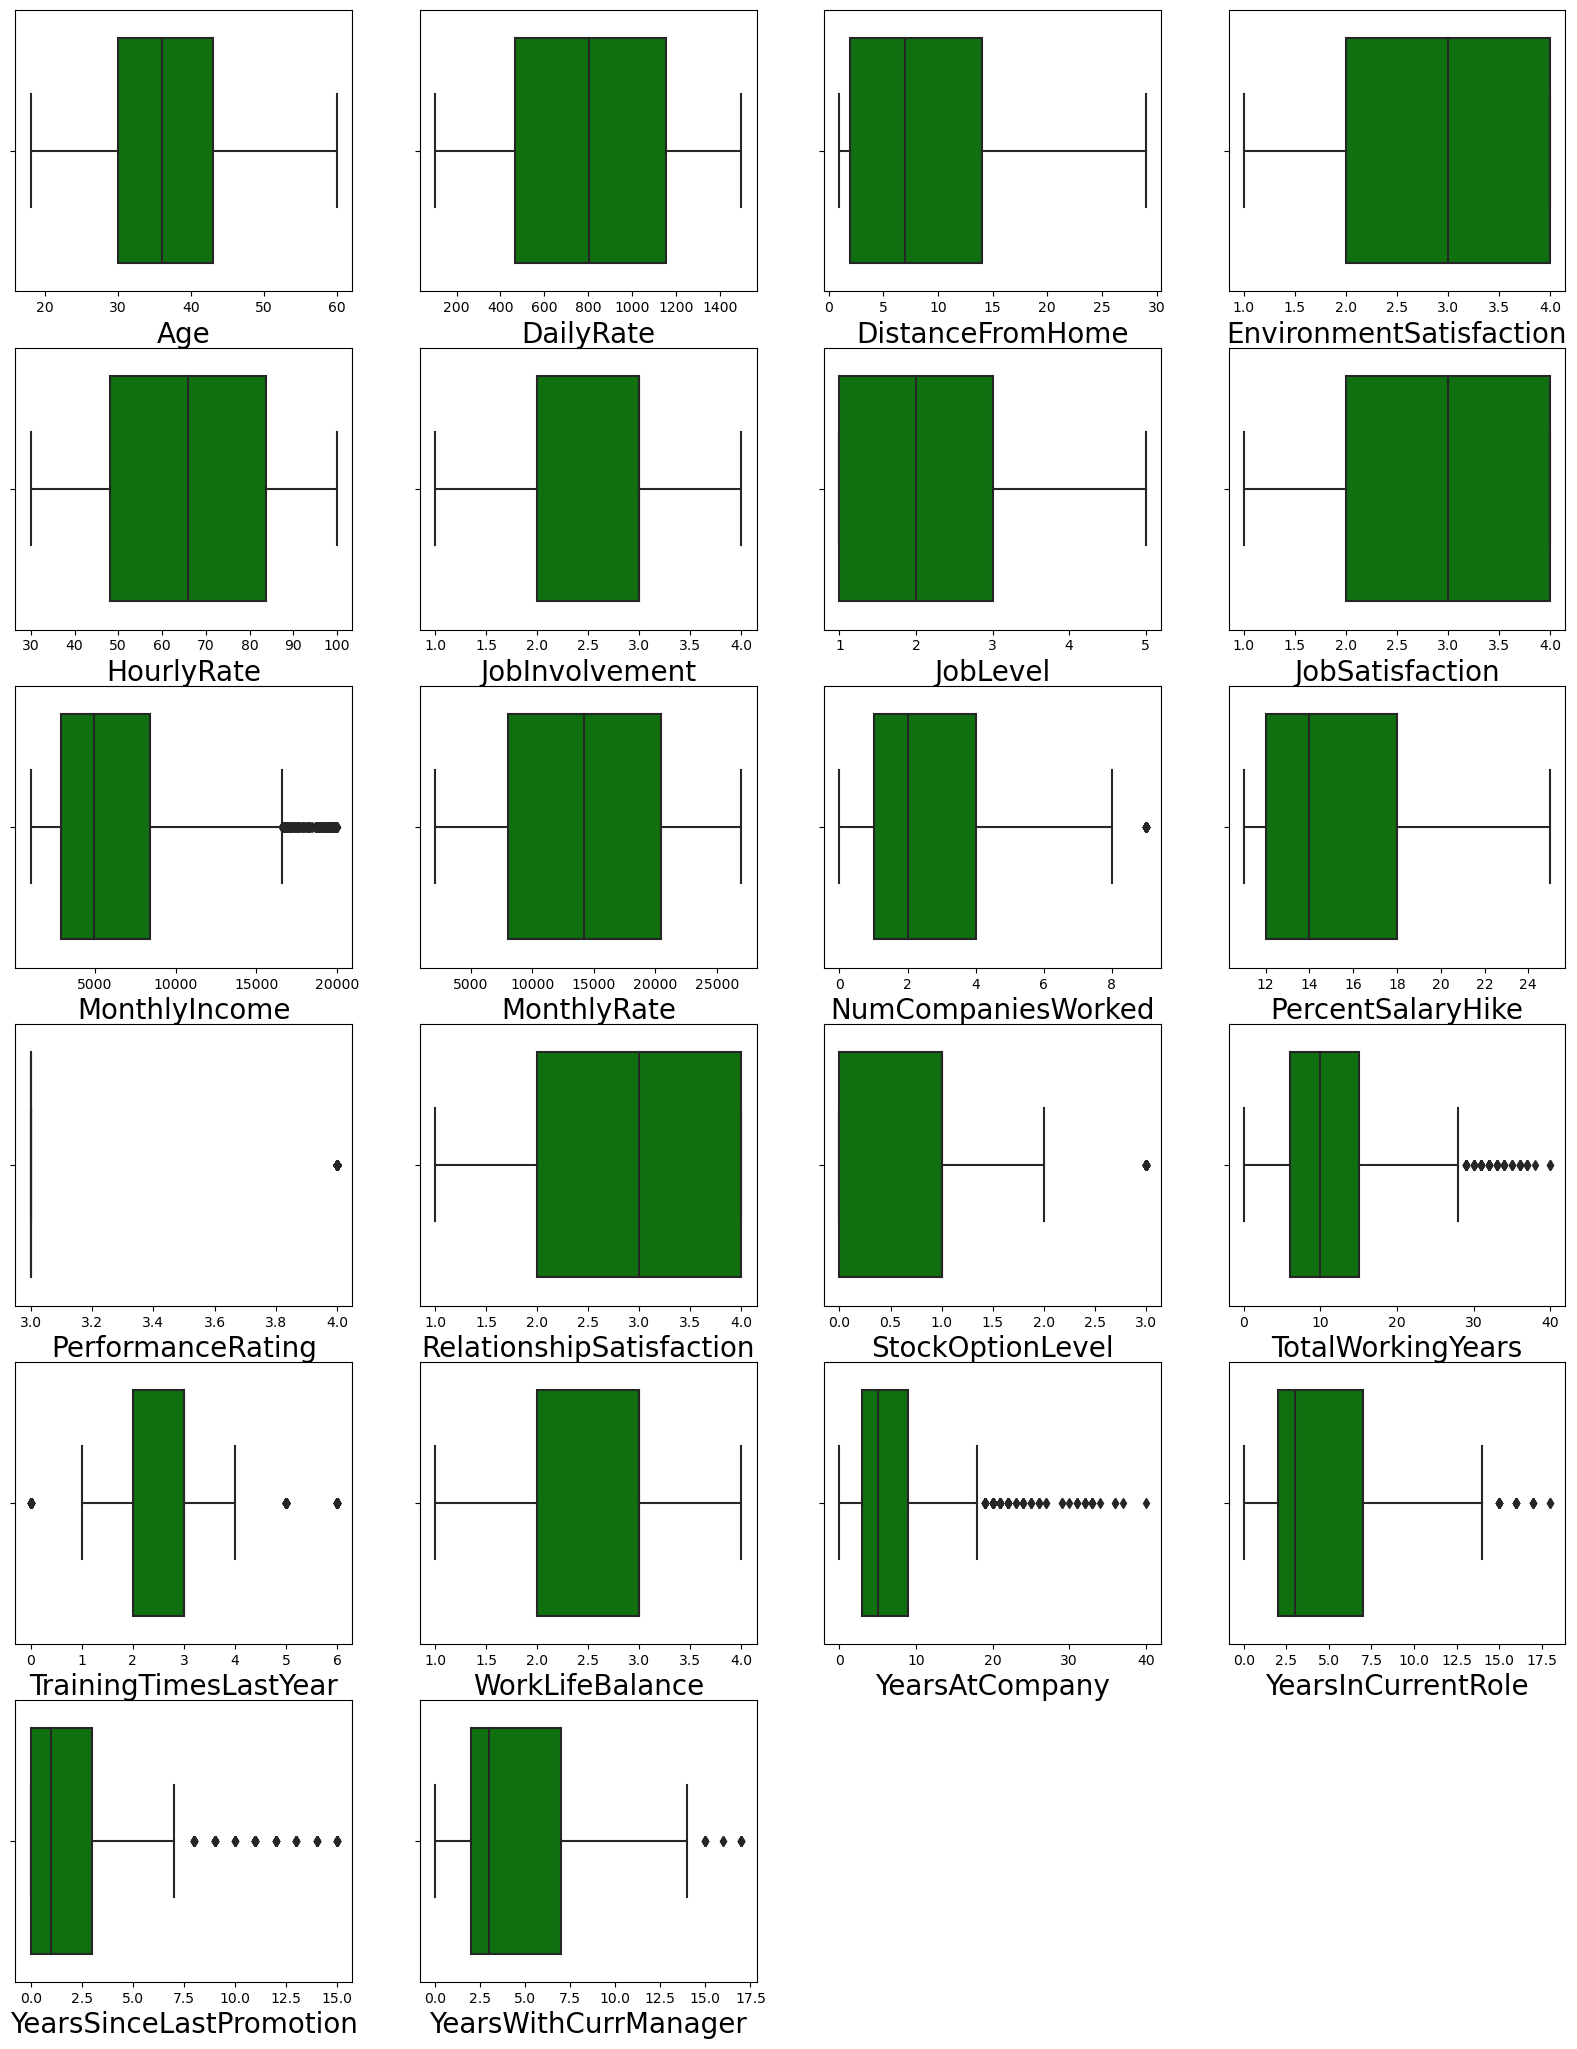

In [97]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numeric:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Skewness of features

In [99]:
df.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
Y

In [100]:
# Splitting data in target and dependent feature
X = df.drop(['Attrition'], axis =1)
Y = df['Attrition']

In [103]:
from sklearn.preprocessing import power_transform
df = power_transform(X)
df = pd.DataFrame(df, columns=X.columns)
df.skew()

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           0.000000
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
YearsAtCompany             -0.008683
Y

In [104]:
df.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.023122,0.008698,-0.031705,-0.020217,0.222197,-0.042503,0.010458,-0.034937,0.024993,...,0.000396,0.049067,0.074398,0.688330,-0.017274,-0.019839,0.296016,0.214870,0.181112,0.205007
BusinessTravel,0.023122,1.000000,-0.002284,-0.008546,-0.004196,0.002295,0.033321,0.006739,-0.020448,0.027346,...,-0.026814,-0.039262,-0.008863,0.032963,0.011046,-0.013531,-0.013268,-0.023616,-0.034572,-0.019191
DailyRate,0.008698,-0.002284,1.000000,0.009475,-0.006339,-0.015889,0.038007,0.018745,-0.009390,0.024923,...,0.000446,0.009514,0.041513,0.020035,0.001518,-0.040560,-0.012831,0.010738,-0.038267,-0.003915
Department,-0.031705,-0.008546,0.009475,1.000000,0.028267,0.008091,0.083399,-0.018705,-0.042226,-0.003057,...,-0.023715,-0.021470,-0.011815,-0.007675,0.040729,0.019835,0.019416,0.051042,0.019560,0.025185
DistanceFromHome,-0.020217,-0.004196,-0.006339,0.028267,1.000000,0.018890,0.016314,-0.010807,0.007120,0.018471,...,0.011620,0.008565,0.026372,-0.006758,-0.019278,-0.026194,0.006935,0.014965,-0.001965,0.006663
Education,0.222197,0.002295,-0.015889,0.008091,0.018890,1.000000,-0.040600,-0.027374,-0.015405,0.017171,...,-0.023231,-0.011414,0.015644,0.168722,-0.021986,0.012489,0.063270,0.059071,0.031791,0.057298
EducationField,-0.042503,0.033321,0.038007,0.083399,0.016314,-0.040600,1.000000,0.038244,-0.008876,-0.019989,...,-0.002094,-0.006867,-0.015419,-0.013070,0.054753,0.042226,-0.000861,0.001852,0.014959,0.013809
EnvironmentSatisfaction,0.010458,0.006739,0.018745,-0.018705,-0.010807,-0.027374,0.038244,1.000000,0.001118,-0.052050,...,-0.029372,0.006627,0.012090,-0.015235,-0.018413,0.025734,0.006821,0.016828,0.028181,-0.000664
Gender,-0.034937,-0.020448,-0.009390,-0.042226,0.007120,-0.015405,-0.008876,0.001118,1.000000,0.000237,...,-0.013859,0.022709,0.011432,-0.044449,-0.037641,0.000237,-0.041930,-0.038321,-0.026019,-0.026981
HourlyRate,0.024993,0.027346,0.024923,-0.003057,0.018471,0.017171,-0.019989,-0.052050,0.000237,1.000000,...,-0.002657,0.001166,0.049036,-0.007556,-0.011174,-0.009125,-0.028621,-0.029461,-0.050841,-0.018600


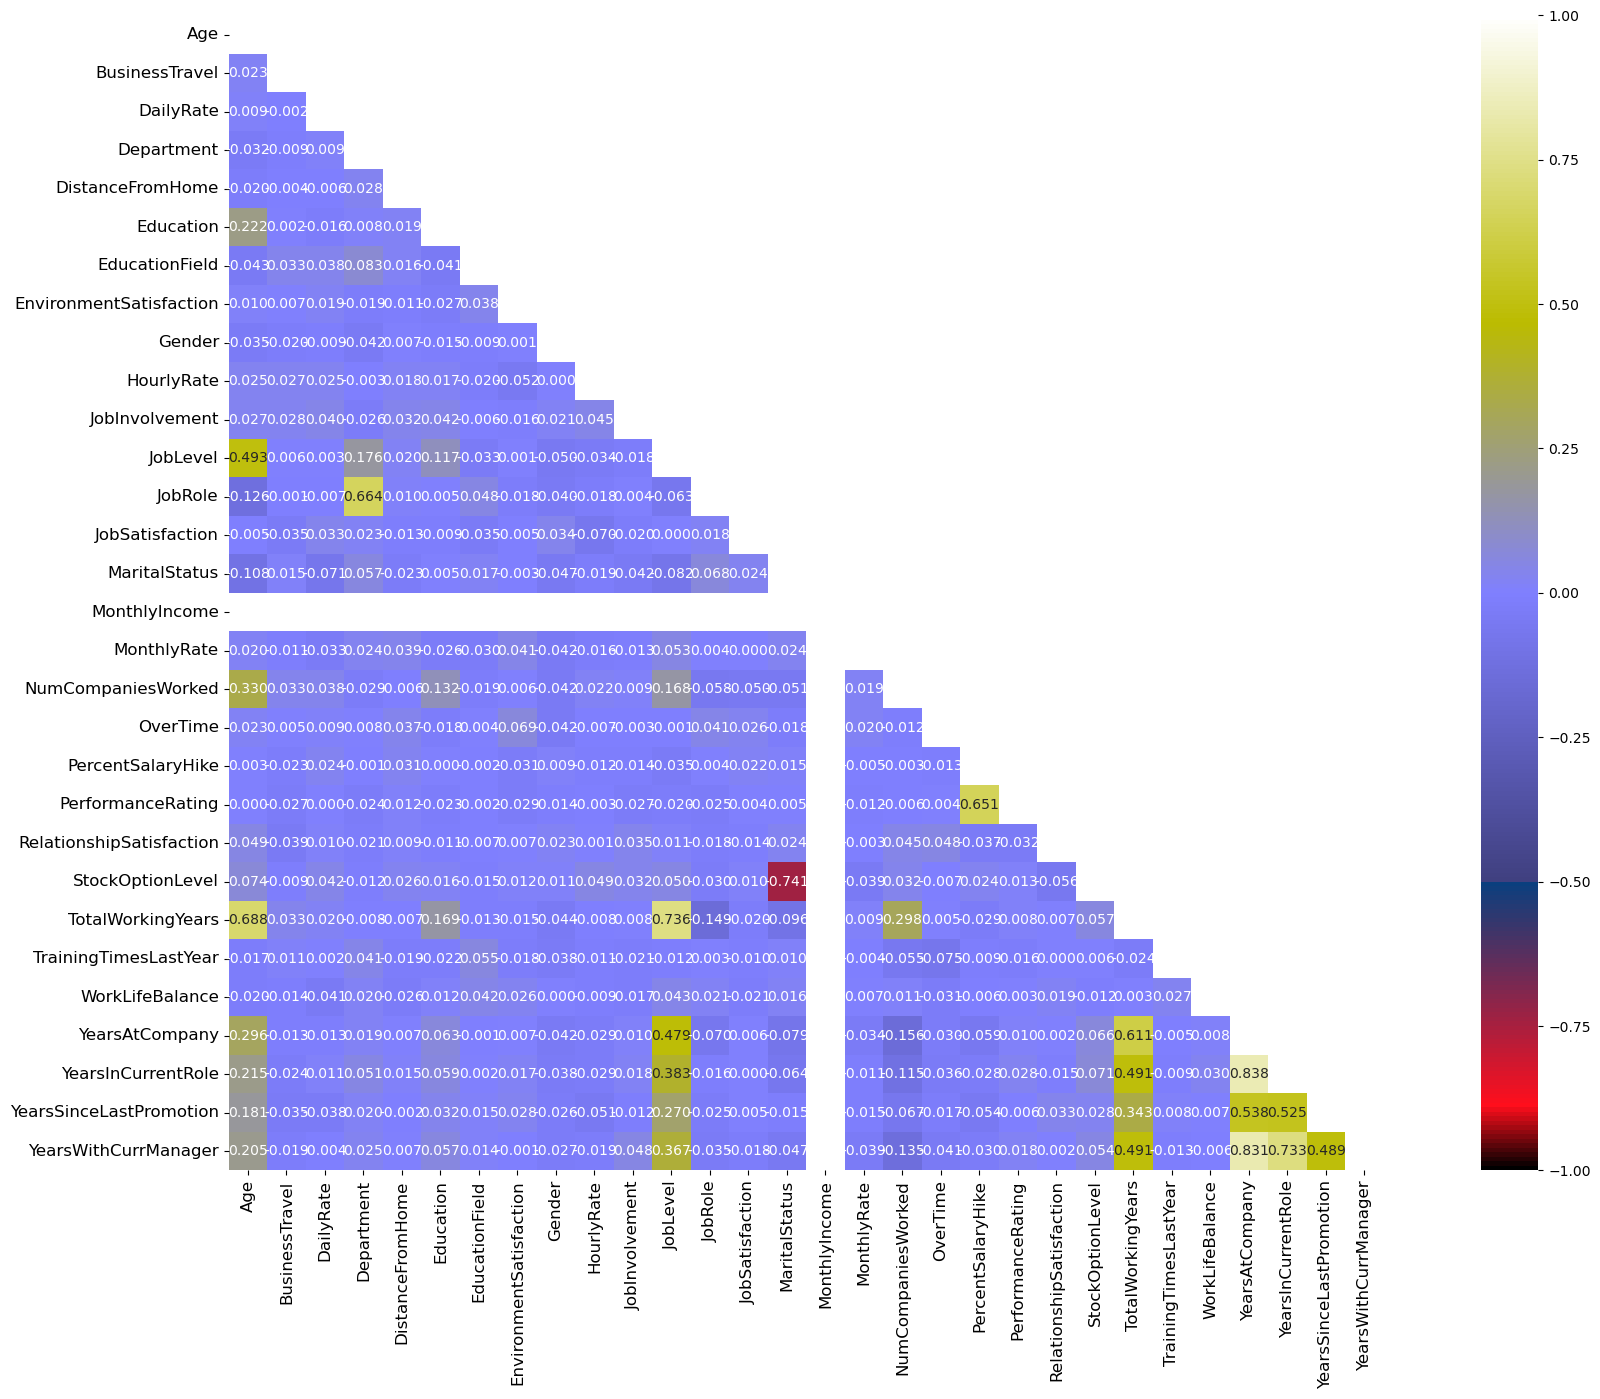

In [105]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [107]:
plt.figure(figsize = (18,6))
df.corr()['Attrition'].drop(['Attrition']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Attrition',fontsize=15)
plt.title('Correlation of features with Target Variable Attrition',fontsize = 18)
plt.show()

KeyError: 'Attrition'

<Figure size 1800x600 with 0 Axes>

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,2.103232,Age
1,1.012363,BusinessTravel
2,1.021841,DailyRate
3,2.026889,Department
4,1.011733,DistanceFromHome
5,1.068224,Education
6,1.027262,EducationField
7,1.019606,EnvironmentSatisfaction
8,1.020096,Gender
9,1.022135,HourlyRate


We can see that multicollinerity is within permissible limit of 10.

In [109]:
#Balancing
from imblearn.over_sampling import SMOTE
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
Y.value_counts()

Yes    1233
No     1233
Name: Attrition, dtype: int64

In [110]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

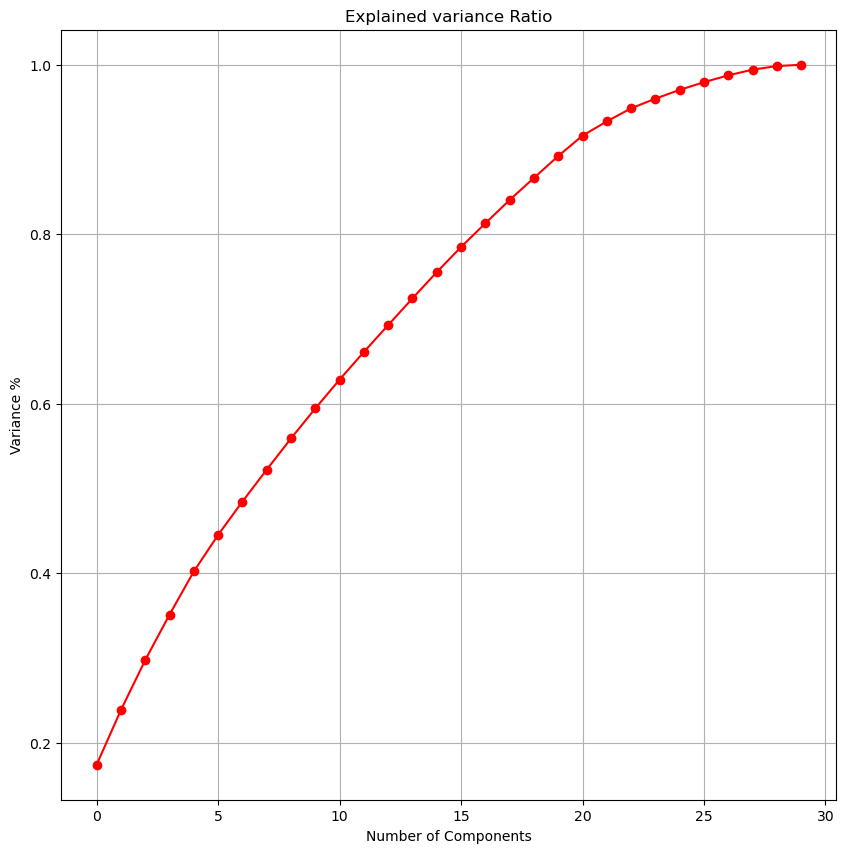

In [111]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

According to the graph, 21 major components account for 90% of the variation in the data. The first 21 elements will be chosen for our projection.

In [112]:
pca_new = PCA(n_components=21)
x_new = pca_new.fit_transform(X_scale)

In [113]:
principle_x=pd.DataFrame(x_new,columns=np.arange(21))

# ML Model

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1652, 21)
Training target vector size: (1652,)
Test feature matrix size: (814, 21)
Test target vector size: (814,)


In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8624078624078624 on Random_state 210


In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=242, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8132678132678133


Confusion matrix of Logistics Regression : 
 [[299  96]
 [ 56 363]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

          No       0.84      0.76      0.80       395
         Yes       0.79      0.87      0.83       419

    accuracy                           0.81       814
   macro avg       0.82      0.81      0.81       814
weighted avg       0.82      0.81      0.81       814



Applying classification algorithm

In [122]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 22),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
  

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8746928746928747


Confusion matrix : 
 [[336  59]
 [ 43 376]]


Classification Report : 
               precision    recall  f1-score   support

          No       0.89      0.85      0.87       395
         Yes       0.86      0.90      0.88       419

    accuracy                           0.87       814
   macro avg       0.88      0.87      0.87       814
weighted avg       0.88      0.87      0.87       814



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.8316953316953317


Confusion matrix : 
 [[318  77]
 [ 60 359]]


Classification Report : 
               precision    recall  f1-score   support

          No       0.84      0.81      0.82       395
         Yes       0.82      0.86      0.84       419

    accuracy                           0.83       814
   macro avg       0.83      0.83      0.83       814
weighted avg       0.83      0.83      0.83       814




# Crossvalidating the data

In [123]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    



Cross Validation Score LogisticRegression() :

Score : [0.65789474 0.70993915 0.69371197 0.71196755 0.70385396]
Mean Score : 0.6954734706949931
Std deviation : 0.019833340540964726




Cross Validation Score SVC() :

Score : [0.58906883 0.61257606 0.57809331 0.61054767 0.60243408]
Mean Score : 0.5985439883059185
Std deviation : 0.013146325511554606




Cross Validation Score GaussianNB() :

Score : [0.67408907 0.77890467 0.73427992 0.76267748 0.77687627]
Mean Score : 0.7453654811079813
Std deviation : 0.03904030906994675




Cross Validation Score DecisionTreeClassifier() :

Score : [0.69433198 0.89249493 0.90060852 0.86815416 0.88235294]
Mean Score : 0.8475885062946021
Std deviation : 0.07739093258722024




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.71659919 0.73833671 0.73225152 0.7484787  0.73225152]
Mean Score : 0.7335835297402502
Std deviation : 0.010358331832727774




Cross Validation Score RandomForestClassifier() :

Score : [0.70445344 0.97565

# Hyper Parameter Tuning

In [124]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}


In [125]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]},
             verbose=3)

In [126]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 50}

# Final Model

In [127]:
Final = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 25, max_depth=20 ,max_features='log2')
Final.fit(X_train,Y_train)
y_pred=Final.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8734643734643734


In [129]:
#Saving Final Model
import joblib
joblib.dump(Final,'IBM_HR_Analytics_Final.pkl')

['IBM_HR_Analytics_Final.pkl']